In [1]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data=pd.read_csv('/kaggle/input/heart-attack-in-youth-vs-adult-in-americastate/heart_attack_youth_vs_adult (1).csv')
data.head()

,ID,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
0,1,Youth,Female,Native American,Current Smoker,Moderate,Average,219,130,24.0,149,High,1,0,Moderate,High,4.3,98,0,0
1,2,Adult,Female,Native American,Non-smoker,Moderate,Average,151,122,35.6,199,Moderate,0,1,Good,Medium,8.0,81,0,0
2,3,Adult,Male,Native American,Former Smoker,Moderate,Average,141,155,22.3,98,High,0,0,Good,Low,5.9,84,0,1
3,4,Adult,Female,Black,Non-smoker,Moderate,Average,220,173,29.8,24,High,0,1,Moderate,Low,8.5,75,0,0
4,5,Youth,Male,White,Non-smoker,Moderate,Average,233,140,30.9,78,High,0,0,Good,Medium,5.9,99,0,1


# Basic Data Information

In [3]:
def basic_information(df):
    # Checking the data shape
    shape=df.shape
    print(f'The data set contains {shape[0]} values and {shape[1]} columns')
    # Checking the duplicate values
    duplicate=df.duplicated().sum()
    print(f'The duplicated values in the dataset {duplicate}')
    # Checking the null values
    null=df.isna().sum()
    print(null)
    # Checking the data information
    df.info()
# Apply the function 
basic_information(data)

The data set contains 5000000 values and 20 columns
The duplicated values in the dataset 0
ID                           0
Age_Group                    0
Gender                       0
Ethnicity                    0
Smoking_Status               0
Alcohol_Consumption    1998915
Diet_Quality                 0
Cholesterol_Level            0
Blood_Pressure               0
BMI                          0
Physical_Activity            0
Stress_Level                 0
Family_History               0
Diabetes                     0
Air_Quality_Index            0
Income_Level                 0
Sleep_Hours                  0
Heart_Rate                   0
Medication_Status            0
Heart_Attack                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   Age_Group            object 
 2   Gender               o

In [4]:
# information
data.describe().style.background_gradient(cmap='winter_r')


,ID,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Family_History,Diabetes,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
count,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000,5000000.000000
mean,2500000.500000,209.467784,134.506569,28.999215,149.559525,0.299800,0.200198,6.999863,74.508136,0.149880,0.100056
std,1443375.817312,51.953050,25.977452,6.349140,86.586017,0.458170,0.400148,1.732367,14.428859,0.356954,0.300075
min,1.000000,120.000000,90.000000,18.000000,0.000000,0.000000,0.000000,4.000000,50.000000,0.000000,0.000000
25%,1250000.750000,164.000000,112.000000,23.500000,75.000000,0.000000,0.000000,5.500000,62.000000,0.000000,0.000000
50%,2500000.500000,209.000000,135.000000,29.000000,150.000000,0.000000,0.000000,7.000000,75.000000,0.000000,0.000000
75%,3750000.250000,254.000000,157.000000,34.500000,225.000000,1.000000,0.000000,8.500000,87.000000,0.000000,0.000000
max,5000000.000000,299.000000,179.000000,40.000000,299.000000,1.000000,1.000000,10.000000,99.000000,1.000000,1.000000


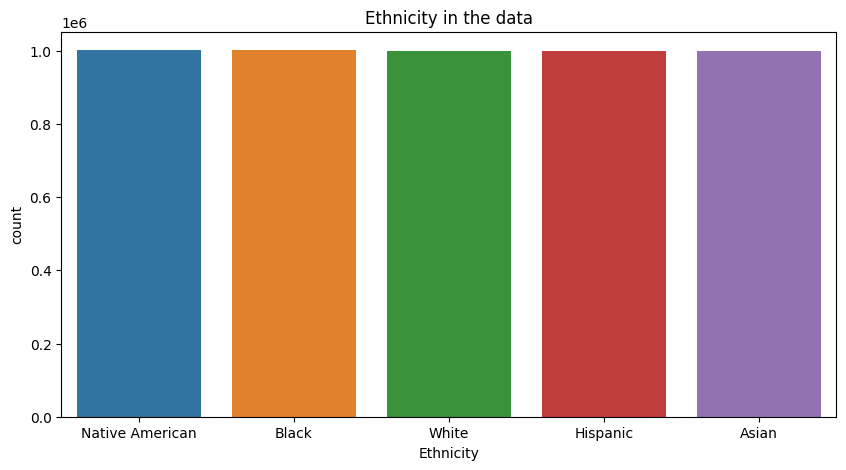

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data,x='Ethnicity')
plt.title('Ethnicity in the data')
plt.show()

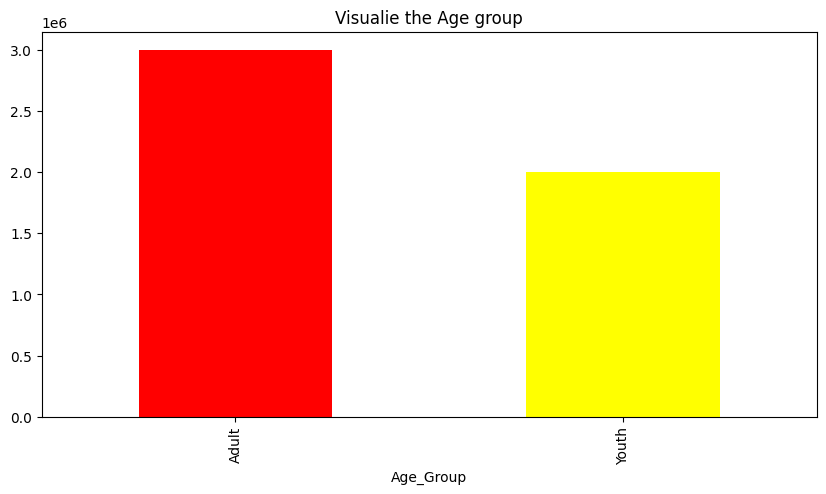

In [6]:
age=data['Age_Group'].value_counts()
plt.figure(figsize=(10,5))
age.plot(kind='bar',title='Visualie the Age group',color=['red','yellow'])
plt.show()

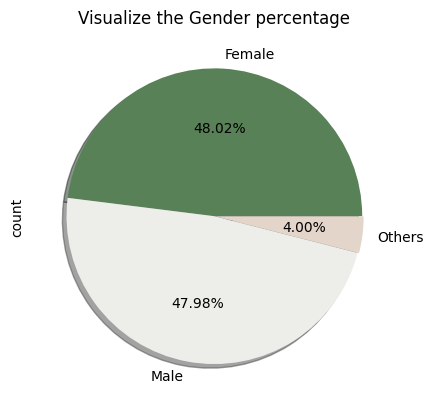

In [7]:
gender=data['Gender'].value_counts()
gender.plot(kind='pie',explode=[0,0,0.01],
    labels=['Female','Male','Others'],
    colors=['#588157','#edede9','#e3d5ca'],
    autopct='%1.2f%%',
    shadow=True,
)
plt.title('Visualize the Gender percentage')
plt.show()

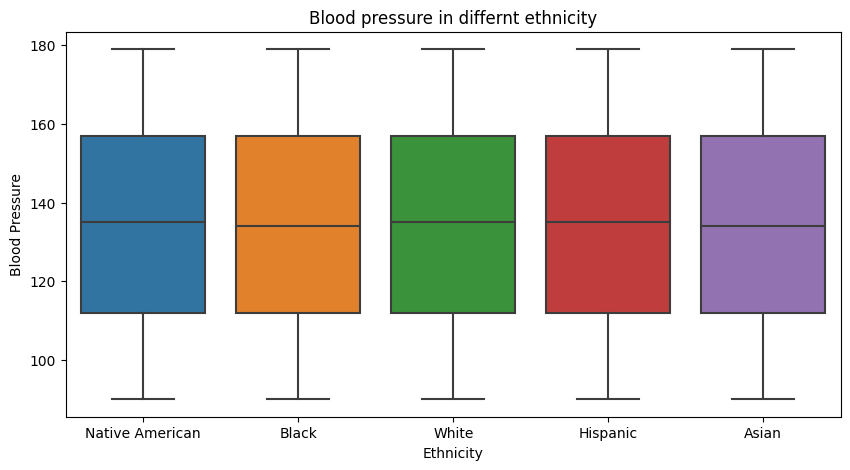

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Ethnicity',y='Blood_Pressure')
plt.title('Blood pressure in differnt ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Blood Pressure')
plt.show()

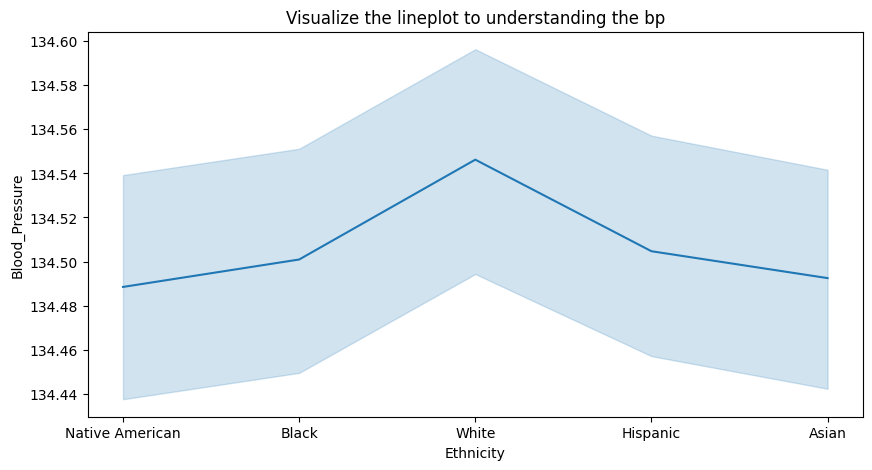

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data,x='Ethnicity',y='Blood_Pressure')
plt.title('Visualize the lineplot to understanding the bp')
plt.xlabel('Ethnicity')
plt.ylabel('Blood_Pressure')
plt.show()

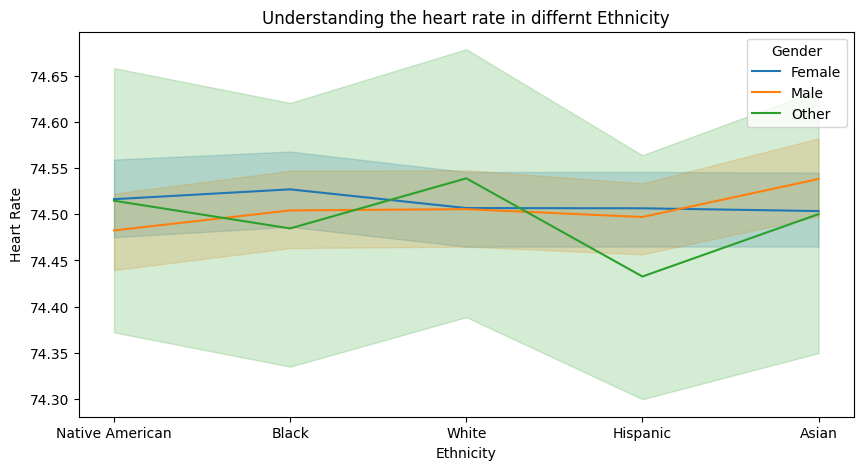

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='Ethnicity',y='Heart_Rate',hue='Gender')
plt.title('Understanding the heart rate in differnt Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Heart Rate')
plt.show()

In [11]:
ethnicity=pd.DataFrame(data.groupby('Gender')['Ethnicity'].value_counts()).unstack()
ethnicity.style.background_gradient(cmap='cubehelix')


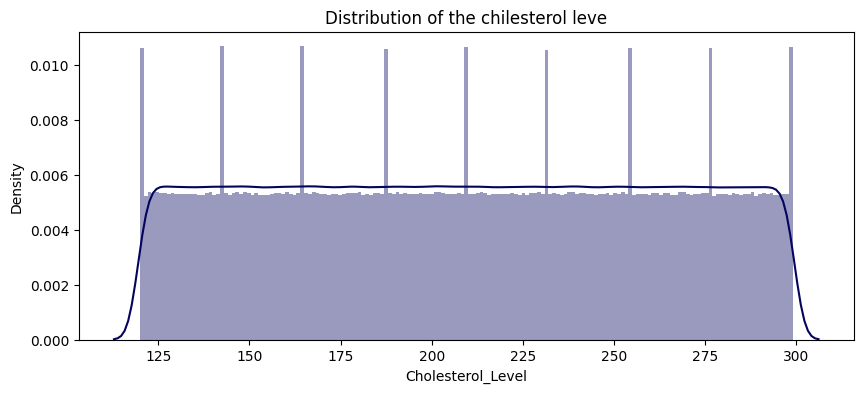

In [12]:
plt.figure(figsize=(10,4))
sns.distplot(data['Cholesterol_Level'],bins='auto',kde=True,color='#03045e')
plt.title('Distribution of the chilesterol leve')
plt.show()

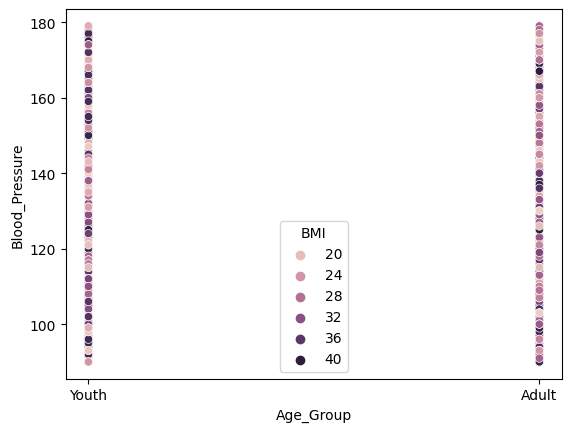

In [13]:
sns.scatterplot(data=data,x='Age_Group',y='Blood_Pressure',hue='BMI')
plt.show()

In [14]:
alcohol_counsumption=pd.DataFrame(data.groupby('Age_Group')['Alcohol_Consumption'].value_counts()).unstack()
alcohol_counsumption.style.background_gradient(cmap='gist_earth')

In [15]:
average_cholestrol_bp=pd.DataFrame(data.groupby('Ethnicity')[['Cholesterol_Level','Blood_Pressure']].mean())
average_cholestrol_bp

,Cholesterol_Level,Blood_Pressure
Ethnicity,,
Asian,209.520205,134.492491
Black,209.473224,134.500936
Hispanic,209.468619,134.504690
Native American,209.417422,134.488486
White,209.459508,134.546237


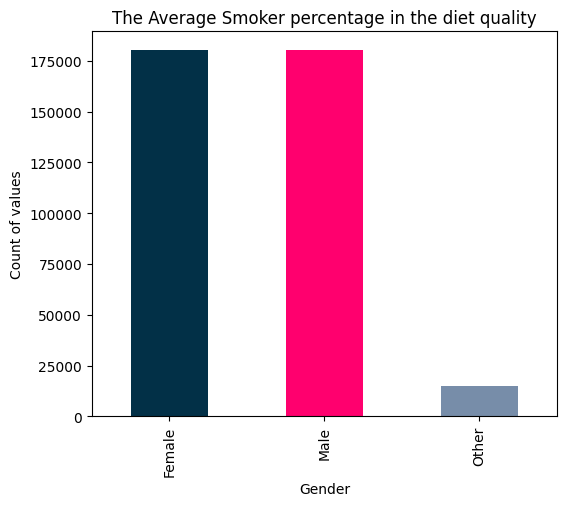

In [16]:
diet=data[data['Diet_Quality']=='Average']
diet=diet[data['Smoking_Status']=='Current Smoker']
diet['Gender'].value_counts()\
.plot(kind='bar',figsize=(6,5),color=['#023047','#ff006e','#778da9'])
plt.title('The Average Smoker percentage in the diet quality')
plt.xlabel('Gender')
plt.ylabel('Count of values')
plt.show()

In [17]:
average_sleep=pd.DataFrame(data.groupby('Age_Group')['Sleep_Hours'].mean())
average_sleep.style.background_gradient(cmap='afmhot_r')

,Sleep_Hours
Age_Group,
Adult,6.999947
Youth,6.999736


In [18]:
min_max_cholesterol=pd.DataFrame(data.pivot_table(values='Cholesterol_Level',index='Ethnicity',columns='Gender',aggfunc=['min','max','mean']))
min_max_cholesterol.style.background_gradient(cmap='crest_r')

In [19]:
average_physical_heart=pd.DataFrame(data.groupby('Ethnicity')[['Physical_Activity','Heart_Rate']].mean())
average_physical_heart.style.background_gradient(cmap='nipy_spectral')

,Physical_Activity,Heart_Rate
Ethnicity,,
Asian,149.779362,74.519952
Black,149.503763,74.514309
Hispanic,149.401939,74.498998
Native American,149.567694,74.499988
White,149.544906,74.507424


In [20]:
strees_level=pd.DataFrame(data.groupby('Ethnicity')['Stress_Level'].value_counts().unstack())
strees_level.style.background_gradient(cmap='plasma')

Stress_Level,High,Low,Moderate
Ethnicity,,,
Asian,200088,299260,499872
Black,200211,300560,500757
Hispanic,199787,300057,498766
Native American,199798,299180,501436
White,199309,300319,500600


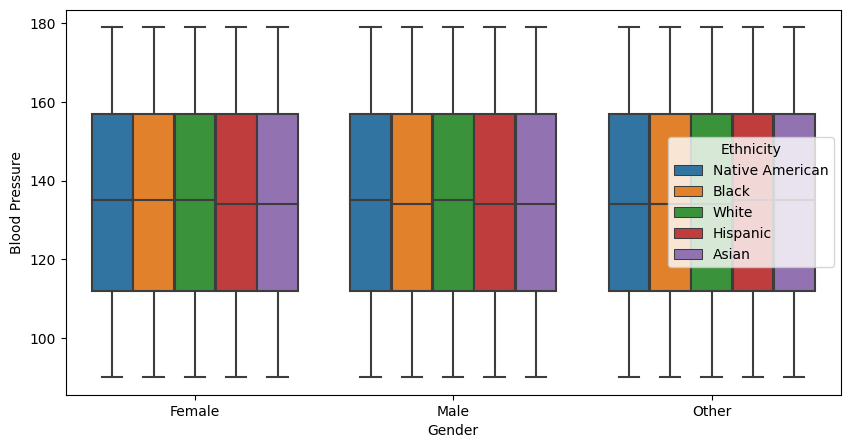

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Gender',y='Blood_Pressure',hue='Ethnicity')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

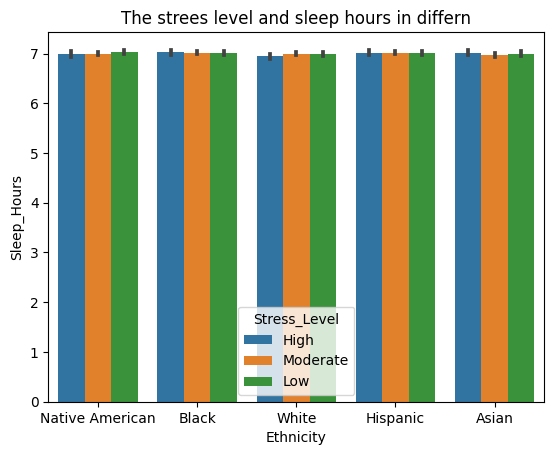

In [22]:
sns.barplot(data=data[:100000],x='Ethnicity',y='Sleep_Hours',hue='Stress_Level')
plt.title('The strees level and sleep hours in differn')
plt.show()

In [23]:
data.head(1)

,ID,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
0,1,Youth,Female,Native American,Current Smoker,Moderate,Average,219,130,24.0,149,High,1,0,Moderate,High,4.3,98,0,0


In [24]:
cate=data.select_dtypes(include='object')
cate.head()

,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Stress_Level,Air_Quality_Index,Income_Level
0,Youth,Female,Native American,Current Smoker,Moderate,Average,High,Moderate,High
1,Adult,Female,Native American,Non-smoker,Moderate,Average,Moderate,Good,Medium
2,Adult,Male,Native American,Former Smoker,Moderate,Average,High,Good,Low
3,Adult,Female,Black,Non-smoker,Moderate,Average,High,Moderate,Low
4,Youth,Male,White,Non-smoker,Moderate,Average,High,Good,Medium


In [25]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [26]:
label=LabelEncoder()
for columns in cate.columns:
    data[columns]=label.fit_transform(data[columns])
data.head()

,ID,Age_Group,Gender,Ethnicity,Smoking_Status,Alcohol_Consumption,Diet_Quality,Cholesterol_Level,Blood_Pressure,BMI,Physical_Activity,Stress_Level,Family_History,Diabetes,Air_Quality_Index,Income_Level,Sleep_Hours,Heart_Rate,Medication_Status,Heart_Attack
0,1,1,0,3,0,1,0,219,130,24.0,149,0,1,0,1,0,4.3,98,0,0
1,2,0,0,3,2,1,0,151,122,35.6,199,2,0,1,0,2,8.0,81,0,0
2,3,0,1,3,1,1,0,141,155,22.3,98,0,0,0,0,1,5.9,84,0,1
3,4,0,0,1,2,1,0,220,173,29.8,24,0,0,1,1,1,8.5,75,0,0
4,5,1,1,4,2,1,0,233,140,30.9,78,0,0,0,0,2,5.9,99,0,1


In [27]:
X=data.drop(['Heart_Attack'],axis=1)
y=data['Heart_Attack']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [28]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
logistic_pred=logistic.predict(X_test)
logistic_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
print(f'The model accuracy score is {accuracy_score(logistic_pred,y_test)*100:.2f}')
print(classification_report(logistic_pred,y_test))

The model accuracy score is 89.99
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1250000
           1       0.00      0.00      0.00         0

    accuracy                           0.90   1250000
   macro avg       0.50      0.45      0.47   1250000
weighted avg       1.00      0.90      0.95   1250000



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred=tree.predict(X_test)
print(f'The decisiontree model accuracy_score {accuracy_score(tree_pred,y_test)*100:.2f}')
print(classification_report(tree_pred,y_test))

The decisiontree model accuracy_score 80.03
              precision    recall  f1-score   support

           0       0.88      0.90      0.89   1094362
           1       0.12      0.10      0.11    155638

    accuracy                           0.80   1250000
   macro avg       0.50      0.50      0.50   1250000
weighted avg       0.78      0.80      0.79   1250000



In [ ]:
random=RandomForestClassifier()
random.fit(X_train,y_train)
random_pred=random.predict(X_test)
print(f'The randomForest classificer score {accuracy_score(random_pred,y_test)*100:.2f}')
print(classification_report(random_pred,y_test))